In [13]:
import pandas as pd

# Dosyanızı buraya yükleyin
file_path = r"C:\Users\90551\Desktop\gearbox2\Bares_T35.xlsx"

# Excel dosyasını oku
df = pd.read_excel(file_path)

# "Unnamed: 0" sütununu "time" olarak adlandır ve datetime formatına çevir
df.rename(columns={'Unnamed: 0': 'time'}, inplace=True)
df['time'] = pd.to_datetime(df['time'])



# Diğer sütunlardaki eksik verileri hareketli ortalama (rolling mean) ile doldur
for col in df.columns[2:]:  # `time` haricindeki sütunlar
    df[col] = df[col].fillna(df[col].rolling(window=15, min_periods=1).mean())

# Veriyi inceleme
print(df.info())
print(df.head())

# Güncellenmiş veriyi kaydetme
df.to_excel("Bares_T35_Cleanedx.xlsx", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57024 entries, 0 to 57023
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  57024 non-null  datetime64[ns]
 1   BRS.T35_N_ROT_PLC     37692 non-null  float64       
 2   BRS.T35_Power         56224 non-null  float64       
 3   BRS.T35_T_GBX_OIL_1   56219 non-null  float64       
 4   BRS.T35_T_GBX_OIL_2   56221 non-null  float64       
 5   BRS.T35_T_GBX_T1_HSS  56221 non-null  float64       
 6   BRS.T35_T_GBX_T1_IMS  56224 non-null  float64       
 7   BRS.T35_T_GBX_T3_HSS  56214 non-null  float64       
 8   BRS.T35_T_GBX_T3_IMS  56204 non-null  float64       
 9   BRS.T35_T_GEAR_BEAR   56214 non-null  float64       
 10  BRS.T35_Temp_Ambient  56225 non-null  float64       
 11  BRS.T35_WIND_DIR      56683 non-null  float64       
 12  BRS.T35_Wind_speed    56224 non-null  float64       
dtypes: datetime64[ns

🔹 İlk 5 Satır:
                   time  BRS.T35_N_ROT_PLC  BRS.T35_Power  BRS.T35_T_GBX_OIL_1  \
0  2024-01-25 00:00:00          10.723178     544.650024            55.150002   
1  2024-01-25 00:10:00          10.255564     420.470001            54.810001   
2  2024-01-25 00:20:00          10.076803     404.429993            54.480000   
3  2024-01-25 00:30:00           9.851302     344.700012            54.139999   
4  2024-01-25 00:40:00           9.354575     157.369995            53.799999   

   BRS.T35_T_GBX_OIL_2  BRS.T35_T_GBX_T1_HSS  BRS.T35_T_GBX_T1_IMS  \
0            58.610001             56.509998             52.779999   
1            57.990002             56.080002             52.410000   
2            57.490002             55.650002             52.029999   
3            56.980000             55.209999             51.660000   
4            56.470001             54.779999             51.279999   

   BRS.T35_T_GBX_T3_HSS  BRS.T35_T_GBX_T3_IMS  BRS.T35_T_GEAR_BEAR  \
0     

C:\Users\90551\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


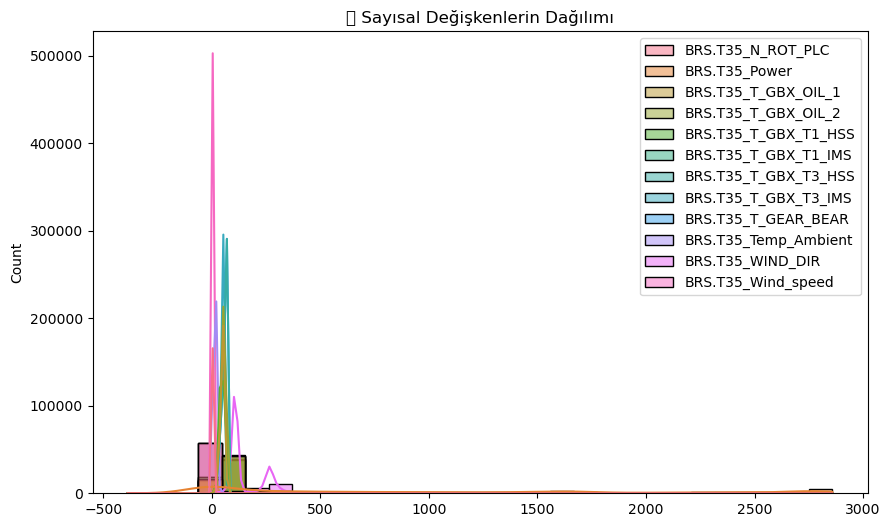

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 1. VERİYİ YÜKLE
file_path = "‪Interpolated_and_Predicted_Data.csv"  # Dosyanın adını gerektiği gibi değiştir
df = pd.read_csv("Interpolated_and_Predicted_Data.csv")

# 📌 2. TEMEL BİLGİLERİ İNCELE
print("🔹 İlk 5 Satır:\n", df.head())
print("\n🔹 Veri Bilgisi:\n")
df.info()
print("\n🔹 İstatistiksel Özet:\n", df.describe())

# 📌 3. EKSİK VERİLERİ GÖSTER
print("\n🔹 Eksik Veri Sayısı:\n", df.isna().sum())

# 📌 4. GÖRSELLEŞTİRME
plt.figure(figsize=(10, 6))
sns.histplot(df.select_dtypes(include=['float64', 'int64']), bins=30, kde=True)
plt.title("📊 Sayısal Değişkenlerin Dağılımı")
plt.show()




C:\Users\90551\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


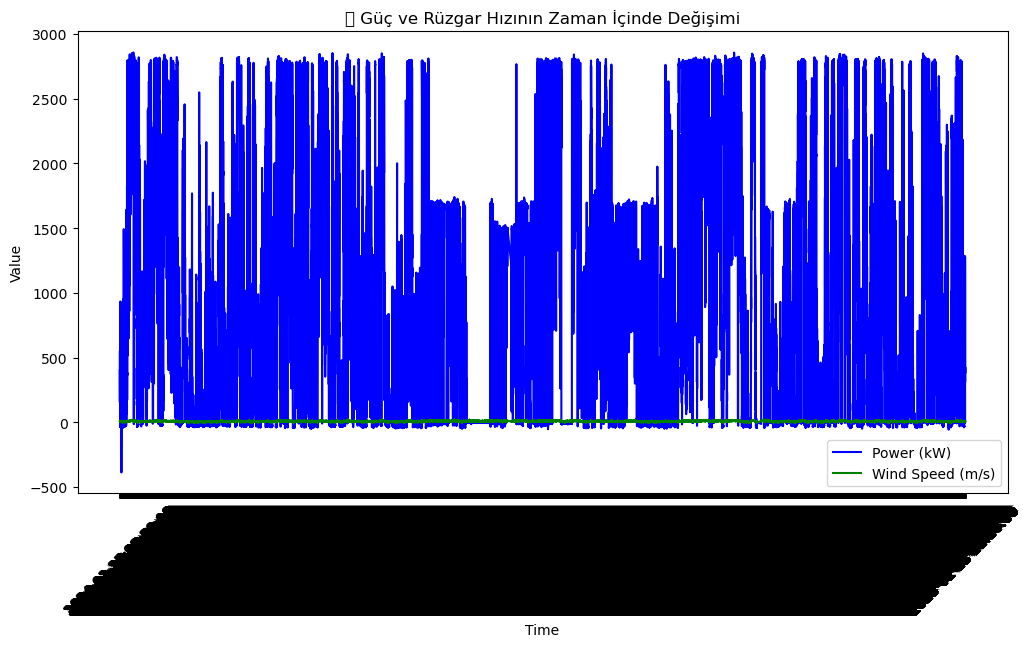

In [37]:
# 📌 5. ZAMAN SERİSİ ANALİZİ (Örnek: Güç & Rüzgar Hızı)
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['BRS.T35_Power'], label='Power (kW)', color='blue')
plt.plot(df['time'], df['BRS.T35_Wind_speed'], label='Wind Speed (m/s)', color='green')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("🔄 Güç ve Rüzgar Hızının Zaman İçinde Değişimi")
plt.legend()
plt.xticks(rotation=45)
plt.show()



In [39]:
# 📌 6. KORELASYON MATRİSİ
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("📌 Korelasyon Matrisi")
plt.show()


ValueError: could not convert string to float: '2024-01-25 00:00:00'

<Figure size 1000x800 with 0 Axes>